In [1]:
import sys
sys.argv.append("-lc=C:/Workspaces/AIC/simod/local_config_files/AIC/vga-manhattan-start_1830-real_speeds.cfg")
from amodsim.init import config

INFO:root:Loading config for project RoadmaptoolsConfig (can be overwritten later)
INFO:root:map_dir: FILL YOUR MAP DIR HERE
osm_source_url: https://s3.amazonaws.com/metro-extracts.mapzen.com/valencia_spain.osm.bz2
osm_map_filename: FILL YOUR MAP DIR HEREmap.osm
filtered_osm_filename: FILL YOUR MAP DIR HEREmap-filtered.osm
geojson_file: FILL YOUR MAP DIR HEREmap.geojson
cleaned_geojson_file: FILL YOUR MAP DIR HEREmap-cleaned.geojson
sanitized_geojson_file: FILL YOUR MAP DIR HEREmap-sanitized.geojson
simplified_file: FILL YOUR MAP DIR HEREmap-simplified.geojson
simplified_file_with_speed: FILL YOUR MAP DIR HEREmap-simplified-speed.geojson
simplified_file_with_speed_and_curvature: FILL YOUR MAP DIR HEREmap-simplified-speed-curvature.geojson
ap_nodes_file: FILL YOUR MAP DIR HEREnodes.geojson
ap_edges_file: FILL YOUR MAP DIR HEREedges.geojson
utm_center_lon: 50.0877506
utm_center_lat: 14.4209293
shift_utm_coordinate_origin_to_utm_center: False
shapely_error_tolerance: 0.005
osm_filter_para

In [47]:
import matplotlib.pyplot as plt
from matplotlib.figure import figaspect
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

import roadmaptools.inout
import roadmaptools.plotting

In [18]:
# Prague
# MIN_LAT = 5_530_000
# MAX_LAT = 5_560_000
# MIN_LON = 445_000
# MAX_LON = 480_000

# Manhtattan
MIN_LAT = 4_505_000
MAX_LAT = 4_527_000
MIN_LON = 582_000
MAX_LON = 593_000

In [43]:
# load road network
fc = roadmaptools.inout.load_geojson(config.agentpolis.map_edges_filepath)

[22:29:35]: Loading geojson file from: C:\AIC Experiment Data\VGA Manhattan\maps\edges_with_measured_speed.geojson


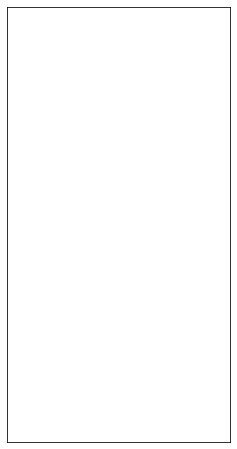

In [58]:
# graph setup
fig, axis = plt.subplots(1, 1)
fig.set_size_inches(figaspect((MAX_LAT - MIN_LAT) / (MAX_LON - MIN_LON)))
fig.subplots_adjust(wspace=0.01)

# remove ticks
axis.set_xticklabels([])
axis.set_yticklabels([])
axis.tick_params(
    which='both',  # both major and minor ticks are affected
    bottom=False,  # ticks along the bottom edge are off
    top=False,  # ticks along the top edge are off
    labelbottom=False, right=False, left=False, labelleft=False, labelright=False, labeltop=False)

In [59]:
# plot road network
xList, yList = roadmaptools.plotting.export_edges_for_matplotlib(roadmaptools.plotting.geojson_edges_iterator(fc))
axis.plot(xList, yList, linewidth=0.2, color='gray', zorder=1)

In [60]:
# stations
stations = roadmaptools.inout.load_csv(config.station_position_filepath)
nodes = roadmaptools.inout.load_geojson(config.agentpolis.map_nodes_filepath)
node_dict = {}
for item in nodes['features']:
    node_dict[item['properties']['index']] = item

[22:41:27]: Loading csv file from: C:\AIC Experiment Data\VGA Manhattan\station_positions.csv
[22:41:27]: Loading geojson file from: C:\AIC Experiment Data\VGA Manhattan\maps\nodes.geojson


In [61]:
x_list = []
y_list = []
projection = None
for station in stations:
    index = int(station[0])

    if not projection:
        projection = roadmaptools.utm.TransposedUTM.from_gps(node_dict[index]['geometry']['coordinates'][1],
                                                             node_dict[index]['geometry']['coordinates'][0])

    coords = roadmaptools.utm.wgs84_to_utm(node_dict[index]['geometry']['coordinates'][1],
                                           node_dict[index]['geometry']['coordinates'][0],
                                           projection)

    x_list.append(coords[0])
    y_list.append(coords[1])
axis.scatter(x_list, y_list, edgecolors='red', facecolors='white', marker='o', s=40, zorder=2)

In [62]:
# scale bar
scalebar = AnchoredSizeBar(axis.transData,
                           5000, '5 km', 'lower right',
                           pad=0.3,
                           color='black',
                           frameon=True,
                           size_vertical=1,
                           borderpad=0.5,
                           fontproperties=fm.FontProperties(size=18))
axis.add_artist(scalebar)

In [63]:
axis.set_xlim(MIN_LON, MAX_LON)
axis.set_ylim(MIN_LAT, MAX_LAT)

plt.tight_layout(h_pad=1)

<Figure size 432x288 with 0 Axes>

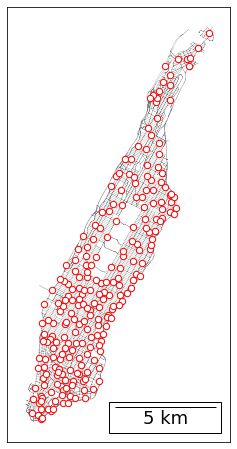

In [64]:
fig

In [68]:
fig.savefig(config.images.stations, bbox_inches='tight', transparent=True, pad_inches=0.02)

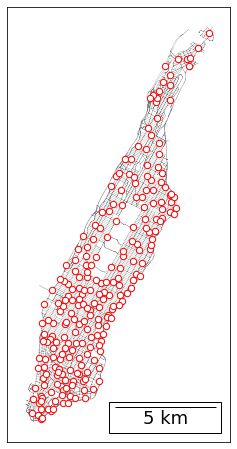

In [66]:
fig